In [29]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ff=pd.read_csv("C:\\ExcelR\\Assignments\\Assignment 17\\forestfires.csv")

In [3]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data=ff.drop(ff.iloc[:,11:30],axis=1)

In [5]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


C:\Users\shreeram kulkarni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

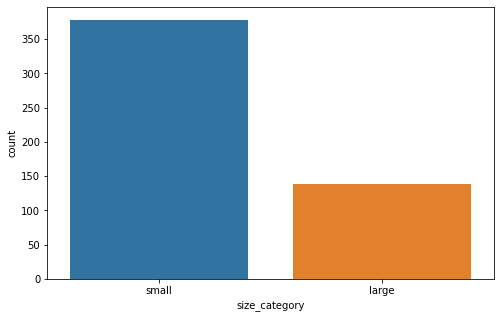

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(ff.size_category)

<AxesSubplot:>

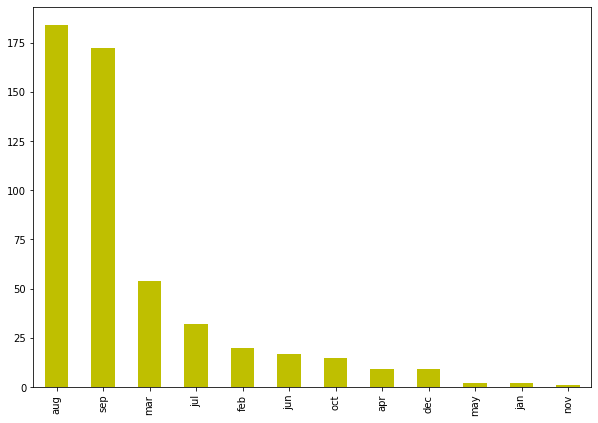

In [33]:
plt.figure(figsize=(10,7))
ff.month.value_counts().plot(kind='bar',color='y')

<AxesSubplot:>

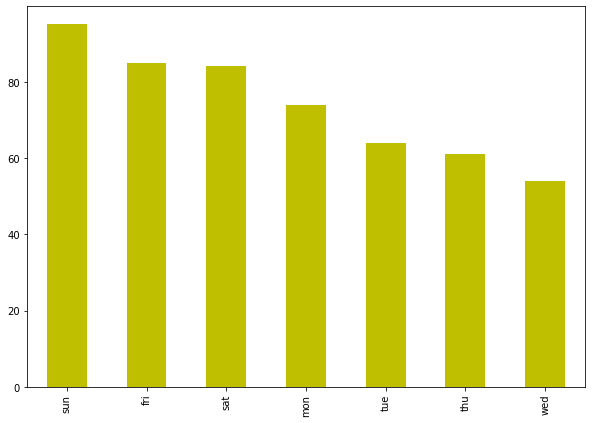

In [34]:
plt.figure(figsize=(10,7))
ff.day.value_counts().plot(kind='bar',color='y')

<AxesSubplot:xlabel='day', ylabel='wind'>

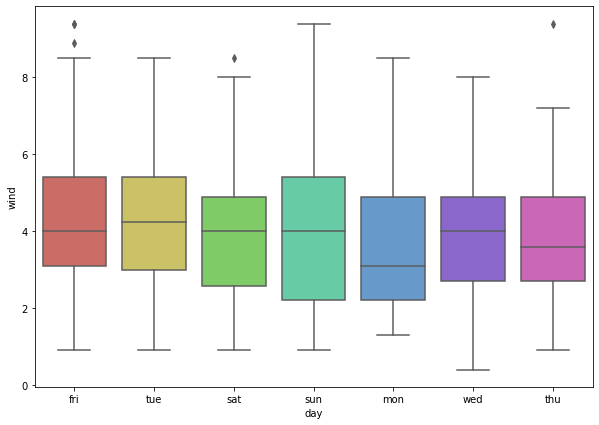

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(x='day',y='wind',data=ff,palette='hls')

<AxesSubplot:xlabel='month', ylabel='temp'>

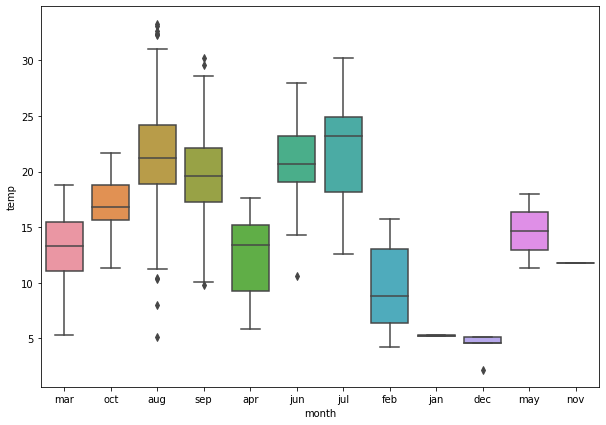

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(x='month',y='temp',data=ff)

In [6]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),('1','2','3','4','5','6','7','8','9','10','11','12'),inplace=True)

In [7]:
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),('1','2','3','4','5','6','7'),inplace=True)
data.size_category.replace(('small','large'),('0','1'),inplace=True)

In [8]:
x=data.iloc[:,0:11]
y=data.iloc[:,11]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Algorithm for Best Parameter

In [22]:
clf=SVC()
param_grid=[{'kernel':['rbf','poly','sigmoid'],'gamma':[5,10,0.5,0.1],'C':[30,25,20,15,10,0.1] }]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [30, 25, 20, 15, 10, 0.1],
                          'gamma': [5, 10, 0.5, 0.1],
                          'kernel': ['rbf', 'poly', 'sigmoid']}])

In [23]:
gsv.best_params_ , gsv.best_score_

({'C': 30, 'gamma': 5, 'kernel': 'poly'}, 0.9734030197444831)

## Building Model on Best Parameters

In [24]:
clf = SVC(C=30, gamma=5,kernel='poly')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 95.1923076923077


array([[72,  2],
       [ 3, 27]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.93      0.90      0.92        30

    accuracy                           0.95       104
   macro avg       0.95      0.94      0.94       104
weighted avg       0.95      0.95      0.95       104

